## Imports 

In [2]:
from __future__ import annotations

import pandas as pd; pd.set_option('display.float_format', lambda x: '%.5f' % x)
import numpy as np; np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

## Load Datasets

In [3]:
# read data from hdf files
driver_data = pd.read_hdf('../data/driver_data.h5')
safety_labels = pd.read_hdf('../data/safety_labels.h5')
sensor_data = pd.read_hdf('../data/sensor_data.h5')

### `sensor_data`
- Consist of entirely numerical data from a sensor on the taxi
- Contains accelerometer and gyroscope readings

In [4]:
display(sensor_data.head())
print(f'Shape: {sensor_data.shape[0]} rows, {sensor_data.shape[1]} columns')
display(sensor_data.describe().T)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006.00000,3.00000,353.00000,1.22887,8.90010,3.98697,0.00822,0.00227,-0.00997,1362,0.00000
1,274877907034.00000,9.29300,17.00000,0.03277,8.65993,4.73730,0.02463,0.00403,-0.01086,257,0.19000
2,884763263056.00000,3.00000,189.00000,1.13967,9.54597,1.95133,-0.00690,-0.01508,0.00112,973,0.66706
3,1073741824054.00000,3.90000,126.00000,3.87154,10.38636,-0.13647,0.00134,-0.33960,-0.01796,902,7.91329
4,1056561954943.00000,3.90000,50.00000,-0.11288,10.55096,-1.56011,0.13057,-0.06170,0.16153,820,20.41941


Shape: 7469656 rows, 11 columns


,count,mean,std,min,25%,50%,75%,max
bookingID,7469656.00000,818337115843.64075,495334756423.03259,0.00000,377957122216.00000,807453851664.00000,1254130450446.00000,1709396983975.00000
Accuracy,7351631.00000,11.62065,87.27007,0.75000,3.90000,4.24700,8.00000,6070.10107
Bearing,7350253.00000,168.96982,107.29417,0.00000,78.00000,168.84042,263.00000,359.99948
acceleration_x,7364539.00000,0.06919,1.42402,-38.98399,-0.50872,0.06131,0.63553,66.87346
acceleration_y,7346553.00000,4.46798,8.13044,-57.80019,-2.02651,9.08148,9.71031,72.81000
acceleration_z,7370520.00000,0.89645,3.25222,-78.44842,-0.92952,0.77766,2.75304,78.05576
gyro_x,7336398.00000,-0.00174,0.14460,-48.45575,-0.02679,-0.00066,0.02329,38.70809
gyro_y,7329944.00000,0.00020,0.33713,-57.34489,-0.02996,0.00026,0.03142,80.31496
gyro_z,7404168.00000,-0.00025,0.14801,-53.55445,-0.01872,-0.00003,0.01825,45.05986
second,7469656.00000,3669.33466,1378355.46436,0.00000,241.00000,520.00000,862.00000,619316528.00000


#### Visualization of **all** values
<img src="images/sensor_data_vis.png">

#### Distribution of **all** values
<img src="images/sensor_data_dist.png">

Data appears to contain a few very extreme anomalies with a scale of about $10^6$.

### `driver_data`
- Consists of almost entirely personal information of the taxi drivers
- Could derive age and car age from dates

In [5]:
display(driver_data.head())
print(f'Shape: {driver_data.shape[0]} rows, {driver_data.shape[1]} columns')
display(driver_data.describe().T)

,id,name,date_of_birth,gender,car_model,car_make_year,rating
0,1,Tressa,1/12/1992,Female,Mazda,2011,4.50000
1,2,Virgilio,10/23/1992,Male,Mazda,2004,3.50000
2,3,Bert,8/10/1989,Male,Nissan,2008,4.50000
3,4,Mahmoud,8/14/1981,Male,Toyota,2008,4.50000
4,5,Felecia,7/20/1990,Female,Hyundai,2010,4.50000


Shape: 148 rows, 7 columns


,count,mean,std,min,25%,50%,75%,max
id,148.00000,74.50000,42.86801,1.00000,37.75000,74.50000,111.25000,148.00000
car_make_year,148.00000,2009.43919,2.39962,2004.00000,2008.00000,2011.00000,2011.00000,2013.00000
rating,148.00000,4.08108,0.54102,3.00000,3.50000,4.00000,4.50000,5.00000


#### Visualization of **all** values
<img src="images/driver_data_vis.png">

#### Distribution of **all** values
<img src="images/driver_data_dist.png">

Data appears to contain no anomalies and all lie within a reasonable range.

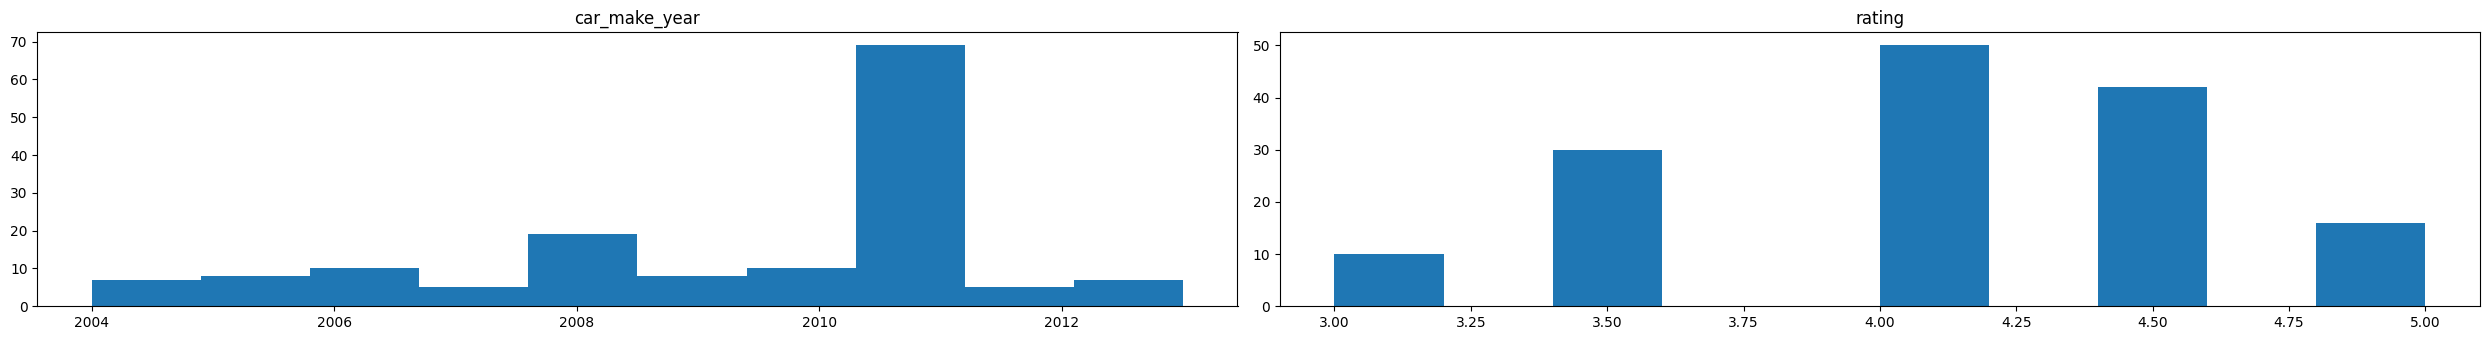

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(25, 3.5)

for i, col in enumerate(['car_make_year', 'rating']):
    axes.flat[i].set_title(col)
    axes.flat[i].hist(driver_data[col])


plt.tight_layout()

### `safety_labels`
- Contains only 3 columns used to map drivers and bookings to their safety labels.
- To do a 3 way merge with the other 2 datasets

In [10]:
display(safety_labels.head())
print(f'Shape: {safety_labels.shape[0]} rows, {safety_labels.shape[1]} columns')
display(safety_labels.describe().T)

,bookingID,driver_id,label
0,111669149733.00000,140,0
1,335007449205.00000,15,1
2,171798691856.00000,61,0
3,1520418422900.00000,97,0
4,798863917116.00000,92,0


Shape: 20000 rows, 3 columns


,count,mean,std,min,25%,50%,75%,max
bookingID,20000.00000,816202700118.13525,494513668936.63861,0.00000,386547056658.75000,798863917138.50000,1245540515908.75000,1709396983975.00000
driver_id,20000.00000,74.44405,42.74658,1.00000,37.00000,75.00000,111.00000,148.00000
label,20000.00000,0.24965,0.43282,0.00000,0.00000,0.00000,0.00000,1.00000
